In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Display the database

In [77]:
df = pd.read_csv("laptop_price.csv", encoding="latin-1") # Use the encoding because the UTF-8 isn't avaliable
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


## See if there are df not so important

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [79]:
df.Product.value_counts() 

Product
XPS 13                                     30
Inspiron 3567                              29
250 G6                                     21
Legion Y520-15IKBN                         19
Vostro 3568                                19
                                           ..
15-bw007nv (A10-9620P/6GB/128GB/Radeon      1
SmartBook 130                               1
A541NA-GO342 (N3350/4GB/500GB/Linux)        1
17-X047na (i3-6006U/8GB/1TB/W10)            1
V330-15IKB (i5-8250U/4GB/500GB/FHD/W10)     1
Name: count, Length: 618, dtype: int64

In [80]:
df = df.drop("Product", axis=1)

Use dummies to see if is 0 (False) or 1 (True)

In [81]:
df = df.join(pd.get_dummies(df.Company))
df = df.drop("Company", axis=1)

In [82]:
df = df.join(pd.get_dummies(df.TypeName))
df = df.drop("TypeName", axis=1)

In [83]:
df

,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Samsung,Toshiba,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,1,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,False,False,False,False,False,False,False,False,True,False
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,False,False,False,False,False,False,False,False,True,False
2,3,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,False,False,False,False,False,False,False,True,False,False
3,4,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,False,False,False,False,False,False,False,False,True,False
4,5,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,...,False,False,False,False,True,False,False,False,False,False
1299,1317,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,...,False,False,False,False,True,False,False,False,False,False
1300,1318,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,...,False,False,False,False,False,False,False,True,False,False
1301,1319,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,...,False,False,False,False,False,False,False,True,False,False


Capturing only the resolution of the column "ScreenResolution"

In [84]:
df['ScreenResolution'] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df['Screen Width'] = df.ScreenResolution.str.split("x").apply(lambda x: x[0])
df['Screen Height'] = df.ScreenResolution.str.split("x").apply(lambda x: x[1])
df


,laptop_ID,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,...,Vero,Xiaomi,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height
0,1,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,...,False,False,False,False,False,False,True,False,2560,1600
1,2,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,...,False,False,False,False,False,False,True,False,1440,900
2,3,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,...,False,False,False,False,False,True,False,False,1920,1080
3,4,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,...,False,False,False,False,False,False,True,False,2880,1800
4,5,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,...,False,False,False,False,False,False,True,False,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00,...,False,False,True,False,False,False,False,False,1920,1080
1299,1317,13.3,3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00,...,False,False,True,False,False,False,False,False,3200,1800
1300,1318,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00,...,False,False,False,False,False,True,False,False,1366,768
1301,1319,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00,...,False,False,False,False,False,True,False,False,1366,768


In [85]:
df = df.drop("ScreenResolution", axis=1)

Get the company and the frequency of the Cpu

In [86]:
df['CPU Brand'] = df.Cpu.str.split().apply(lambda x: x[0])
df['CPU Frequency'] = df.Cpu.str.split().apply(lambda x: x[-1])

df.drop("Cpu", axis=1)

# Removing the strings of the 'CPU Frequency'
df['CPU Frequency'] = df['CPU Frequency'].str[:-3]
df['CPU Frequency'] = df['CPU Frequency'].astype(float)

# Removing the "GB" of "Ram" columns
df['Ram'] = df['Ram'].str[:-2]
df['Ram'] = df['Ram'].astype(int)

df['Screen Height'] = df['Screen Height'].astype(int)
df['Screen Width'] =  df['Screen Width'].astype(int)

df['Memory Amount'] = df['Memory'].str.split(" ").apply(lambda x: x[0])
df['Memory Type'] = df['Memory'].str.split(" ").apply(lambda x: x[1])

df.head(3)

,laptop_ID,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Acer,...,Netbook,Notebook,Ultrabook,Workstation,Screen Width,Screen Height,CPU Brand,CPU Frequency,Memory Amount,Memory Type
0,1,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,False,...,False,False,True,False,2560,1600,Intel,2.3,128GB,SSD
1,2,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,False,...,False,False,True,False,1440,900,Intel,1.8,128GB,Flash
2,3,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,False,...,False,True,False,False,1920,1080,Intel,2.5,256GB,SSD


In [87]:
df['Memory Type'].value_counts()

Memory Type
SSD       843
HDD       375
Flash      75
Hybrid     10
Name: count, dtype: int64

array([[<Axes: title={'center': 'laptop_ID'}>,
        <Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>],
       [<Axes: title={'center': 'Price_euros'}>,
        <Axes: title={'center': 'Screen Width'}>,
        <Axes: title={'center': 'Screen Height'}>],
       [<Axes: title={'center': 'CPU Frequency'}>, <Axes: >, <Axes: >]],
      dtype=object)

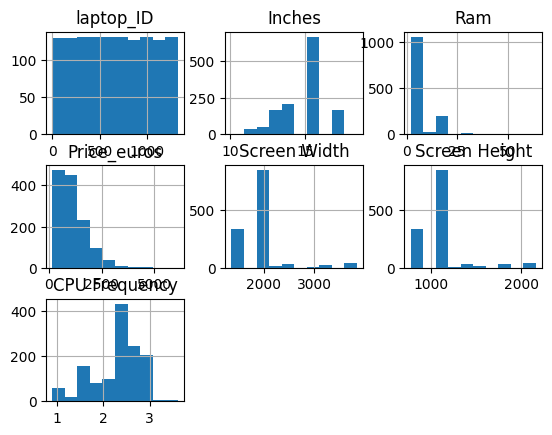

In [88]:
df.hist()

In [89]:
def turn_memory_into_MB (value):
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    elif "TB" in value:
        return float(value[:value.find("TB")]) * 1000000

In [90]:
df = df.drop("Memory", axis=1)
df = df.drop("Cpu", axis=1)

In [91]:
df['Weight'] = df['Weight'].str[:-2]
df['Weight'] = df['Weight'].astype(float) # Define the type float

In [92]:
# Capture the important parts of the GPU
df["GPU Brand"] = df.Gpu.str.split(" ").apply(lambda x: x[0])
df = df.drop("Gpu", axis=1)

## Get the ´´Dummies´´ of the System Operation

In [93]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop("OpSys", axis=1)

In [94]:
cpu_categories = pd.get_dummies(df['GPU Brand'])
cpu_categories.columns = [col + "_Gpu" for col in cpu_categories.columns] # Use list comprehention to insert "_Cpu" in the columns

df = df.join(cpu_categories) # Connect the dummies of the cpu categories in the Dataframe
df.drop("GPU Brand", axis=1)

,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu
0,1,13.3,8,1.37,1339.69,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,2,13.3,8,1.34,898.94,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,3,15.6,8,1.86,575.00,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,4,15.4,16,1.83,2537.45,False,True,False,False,False,...,False,False,False,False,False,True,True,False,False,False
4,5,13.3,8,1.37,1803.60,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,4,1.80,638.00,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1299,1317,13.3,16,1.30,1499.00,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1300,1318,14.0,2,1.50,229.00,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1301,1319,15.6,6,2.19,764.00,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


## Plot the correlation

In [95]:
# Transform the BOOL(True or False) in int
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

In [96]:
df_numeric = df.select_dtypes(include='number') # select only numerics columns
correlation_matrix = df_numeric.corr()
display(correlation_matrix)


,laptop_ID,Inches,Ram,Weight,Price_euros,Acer,Apple,Asus,Chuwi,Dell,...,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS,AMD_Gpu,ARM_Gpu,Intel_Gpu,Nvidia_Gpu
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.057721,-0.119585,-0.044252,-0.043348,-0.013628,...,0.009431,-0.069617,-0.008729,-0.061942,0.194094,-0.158931,-0.089050,0.039920,0.094479,-0.037596
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,0.009435,-0.158850,0.112766,-0.017426,0.045288,...,-0.127740,0.110131,0.088614,-0.093285,-0.064775,-0.100867,0.207023,-0.052816,-0.592264,0.486561
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,...,0.001822,-0.088980,0.149562,-0.021374,-0.017529,0.028914,-0.093119,-0.023894,-0.319551,0.415464
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,...,-0.100576,0.051578,0.082438,-0.087904,-0.048100,-0.096042,0.106519,-0.037026,-0.596378,0.565232
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,...,0.015656,-0.177094,0.137048,0.018312,0.152381,0.089928,-0.199415,-0.018431,-0.184205,0.348797
Acer,-0.057721,0.009435,-0.138432,0.056444,-0.208349,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,...,-0.023027,-0.067673,-0.065093,-0.023027,-0.055411,-0.029411,-0.034859,-0.008119,0.005305,0.020848
Apple,-0.119585,-0.158850,0.023950,-0.138191,0.080688,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,...,0.614108,-0.029563,-0.275713,-0.010059,-0.024206,0.784352,0.001749,-0.003547,0.078028,-0.085183
Asus,-0.044252,0.112766,0.088634,0.101332,-0.010376,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,...,-0.029197,-0.042919,0.055472,0.030999,-0.070257,-0.037291,-0.073770,-0.010295,-0.106654,0.170742
Chuwi,-0.043348,-0.017426,-0.035117,-0.022536,-0.055646,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,...,-0.003776,-0.011096,0.022300,-0.003776,-0.009086,-0.004822,-0.019232,-0.001331,0.043093,-0.031972
Dell,-0.013628,0.045288,0.082241,0.088465,0.048509,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,...,-0.042706,-0.125507,0.041451,-0.042706,-0.032633,-0.054545,0.190722,-0.015058,-0.075707,-0.060187


## See this in a heatmap

<Axes: >

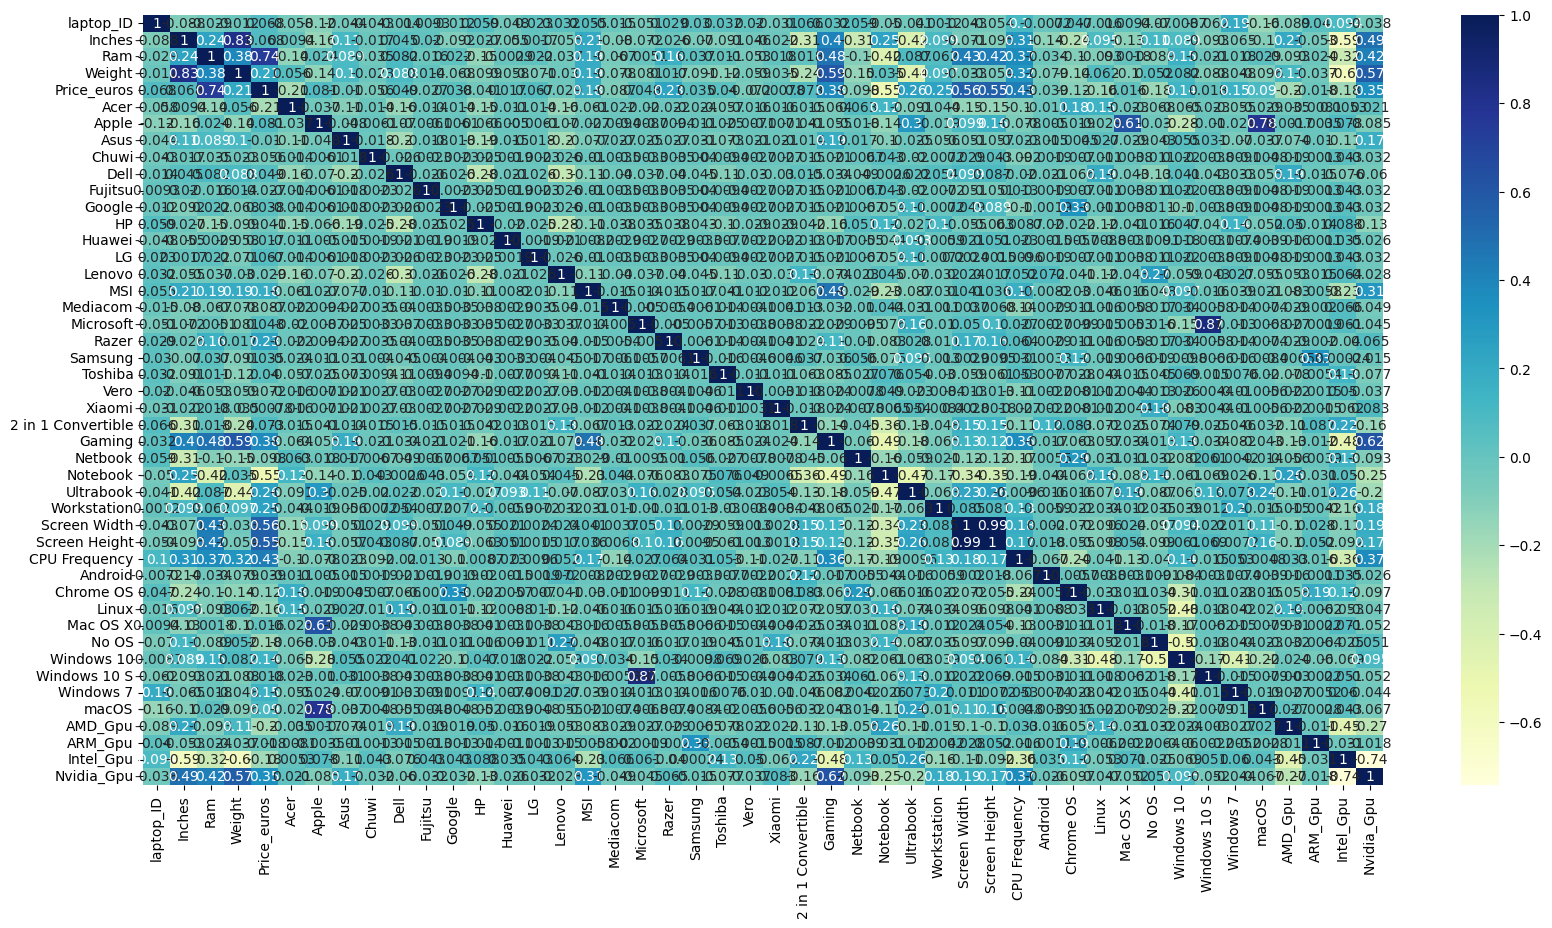

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot= True, cmap='YlGnBu')


## Selecting the bests correlations

In [98]:
target_correlations = correlation_matrix.corr()['Price_euros'].apply(abs).sort_values()
target_correlations

Mac OS X              0.000684
Google                0.001624
Samsung               0.011579
Huawei                0.013847
Windows 10 S          0.014624
Toshiba               0.028503
Xiaomi                0.034735
Microsoft             0.035050
laptop_ID             0.042579
Lenovo                0.052065
LG                    0.059814
ARM_Gpu               0.074391
Apple                 0.093045
Asus                  0.102970
2 in 1 Convertible    0.106120
Android               0.107240
Windows 7             0.120997
Fujitsu               0.124500
Dell                  0.131533
macOS                 0.131720
Chuwi                 0.137089
HP                    0.160944
Inches                0.189723
Vero                  0.194713
Mediacom              0.207608
Netbook               0.276924
No OS                 0.309384
Chrome OS             0.310731
Ultrabook             0.315643
AMD_Gpu               0.335437
Weight                0.336787
Windows 10            0.342797
Linux   

## Select only if the correlation is more than 0.27

In [99]:
"How we already sort values, just capture the latest"

selected_features = target_correlations[-21:].index
selected_features = list(selected_features)

In [100]:
selected_features

['Netbook',
 'No OS',
 'Chrome OS',
 'Ultrabook',
 'AMD_Gpu',
 'Weight',
 'Windows 10',
 'Linux',
 'Intel_Gpu',
 'Workstation',
 'Acer',
 'Razer',
 'MSI',
 'Nvidia_Gpu',
 'Gaming',
 'CPU Frequency',
 'Screen Height',
 'Notebook',
 'Screen Width',
 'Ram',
 'Price_euros']

## Using the important data to ``machine learning``

In [101]:
limited_df = df[selected_features]
limited_df

,Netbook,No OS,Chrome OS,Ultrabook,AMD_Gpu,Weight,Windows 10,Linux,Intel_Gpu,Workstation,...,Razer,MSI,Nvidia_Gpu,Gaming,CPU Frequency,Screen Height,Notebook,Screen Width,Ram,Price_euros
0,0,0,0,1,0,1.37,0,0,1,0,...,0,0,0,0,2.3,1600,0,2560,8,1339.69
1,0,0,0,1,0,1.34,0,0,1,0,...,0,0,0,0,1.8,900,0,1440,8,898.94
2,0,1,0,0,0,1.86,0,0,1,0,...,0,0,0,0,2.5,1080,1,1920,8,575.00
3,0,0,0,1,1,1.83,0,0,0,0,...,0,0,0,0,2.7,1800,0,2880,16,2537.45
4,0,0,0,1,0,1.37,0,0,1,0,...,0,0,0,0,3.1,1600,0,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1.80,1,0,1,0,...,0,0,0,0,2.5,1080,0,1920,4,638.00
1299,0,0,0,0,0,1.30,1,0,1,0,...,0,0,0,0,2.5,1800,0,3200,16,1499.00
1300,0,0,0,0,0,1.50,1,0,1,0,...,0,0,0,0,1.6,768,1,1366,2,229.00
1301,0,0,0,0,1,2.19,1,0,0,0,...,0,0,0,0,2.5,768,1,1366,6,764.00


<Axes: >

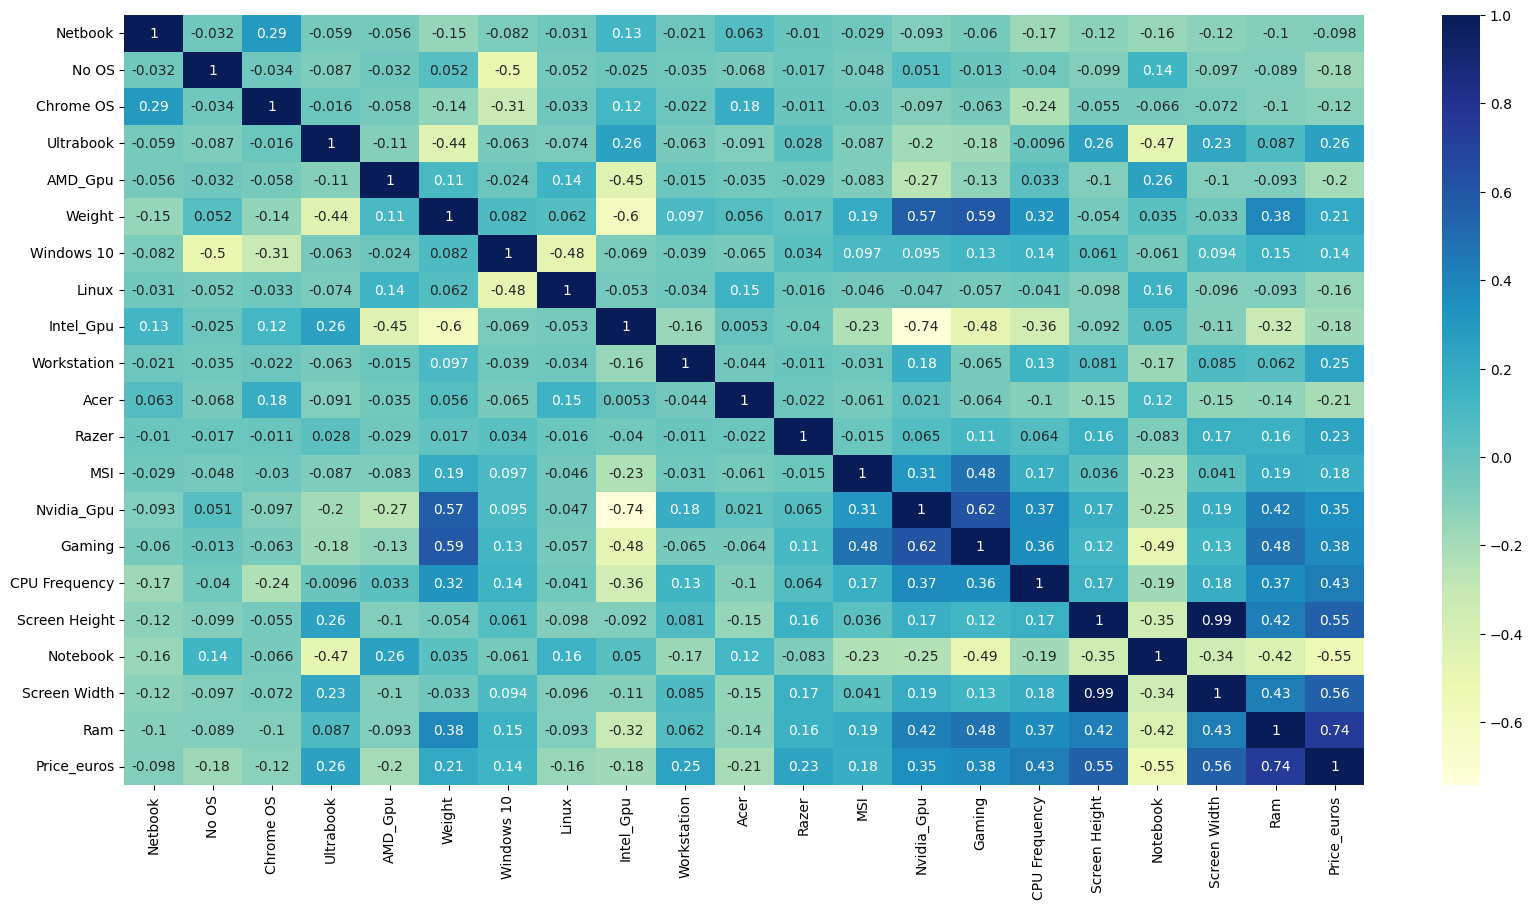

In [102]:
plt.figure(figsize=(20,10))
sns.heatmap(limited_df.corr(), annot= True, cmap='YlGnBu')

## Using the ``Decision Tree``

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop("Price_euros", axis=1), limited_df['Price_euros']  # X and Y values

"""
 Will be use 15% of the data to test and 85% to train ((test_size=0.15))
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)  # X e Y train + test

scaler =  StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [104]:
forest = RandomForestRegressor()

forest.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [105]:
from sklearn.model_selection import GridSearchCV

param_grid = {
     'n_estimators': [30 ,50, 100],
     'max_features': [8, 12, 20]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score= True)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

## Define what's the best estimator

In [106]:
best_forest = grid_search.best_estimator_

## Select the best performance

In [107]:
best_forest.score(X_test_scaled, y_test)

0.8315368280744629

`` If wish to improve the performance, you need to change the *param_grid*  ``

## Previous

In [137]:
limited_df

,Netbook,No OS,Chrome OS,Ultrabook,AMD_Gpu,Weight,Windows 10,Linux,Intel_Gpu,Workstation,...,Razer,MSI,Nvidia_Gpu,Gaming,CPU Frequency,Screen Height,Notebook,Screen Width,Ram,Price_euros
0,0,0,0,1,0,1.37,0,0,1,0,...,0,0,0,0,2.3,1600,0,2560,8,1339.69
1,0,0,0,1,0,1.34,0,0,1,0,...,0,0,0,0,1.8,900,0,1440,8,898.94
2,0,1,0,0,0,1.86,0,0,1,0,...,0,0,0,0,2.5,1080,1,1920,8,575.00
3,0,0,0,1,1,1.83,0,0,0,0,...,0,0,0,0,2.7,1800,0,2880,16,2537.45
4,0,0,0,1,0,1.37,0,0,1,0,...,0,0,0,0,3.1,1600,0,2560,8,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,0,0,0,0,0,1.80,1,0,1,0,...,0,0,0,0,2.5,1080,0,1920,4,638.00
1299,0,0,0,0,0,1.30,1,0,1,0,...,0,0,0,0,2.5,1800,0,3200,16,1499.00
1300,0,0,0,0,0,1.50,1,0,1,0,...,0,0,0,0,1.6,768,1,1366,2,229.00
1301,0,0,0,0,1,2.19,1,0,0,0,...,0,0,0,0,2.5,768,1,1366,6,764.00


In [112]:
print(limited_df.columns.tolist())


['Netbook', 'No OS', 'Chrome OS', 'Ultrabook', 'AMD_Gpu', 'Weight', 'Windows 10', 'Linux', 'Intel_Gpu', 'Workstation', 'Acer', 'Razer', 'MSI', 'Nvidia_Gpu', 'Gaming', 'CPU Frequency', 'Screen Height', 'Notebook', 'Screen Width', 'Ram', 'Price_euros']


In [141]:
# Example of new input data to predict the price of a laptop (replace with actual values)
new_data = pd.DataFrame({
    'Netbook': [0], 
    'No OS': [1],
    'Chrome OS': [0],
    'Ultrabook': [0],
    'AMD_Gpu': [1],
    'Weight': [1.34],
    'Windows 10': [1],
    'Linux': [0],
    'Intel_Gpu': [1],
    'Workstation': [0],
    'Acer': [0],
    'Razer': [1],
    'MSI': [0],
    'Nvidia_Gpu': [1],
    'Gaming': [0],
    'CPU Frequency': [2.5],
    'Screen Height': [2160],
    'Notebook': [1],
    'Screen Width': [1920],
    'Ram': [16],
})

new_data_scaled = scaler.transform(new_data)

# Use the trained model to predict the price
predicted_price = best_forest.predict(new_data_scaled)

print(f"The predicted price of a new laptop is:: € {predicted_price[0]:.2f}")


The predicted price of a new laptop is:: € 1815.42
